In [1]:
import numpy as np
import pandas as pd
import warnings

In [2]:
warnings.filterwarnings("ignore")
#if we get any warning iit is used to ignore the warnings

In [3]:
## get the dataset

In [4]:
column_names=["user_id","item_id","rating","timestamp"]
data=pd.read_csv(r"C:\Users\KIIT\Desktop\projects\movie based recommendation system\ml-100k/u.data",sep="\t",names=column_names)
#we have given the seperator as \t because we are reading the tab seperated file and not the comma seperated file

In [5]:
data.head(n=10)

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


In [6]:
#earlier shape was(9999,4) but as we have added the column names the shape has changed
data.shape

(100000, 4)

In [7]:
data["user_id"].nunique()


943

In [8]:
data ["item_id"].nunique()

1682

In [9]:
pd.read_csv(r"C:\Users\KIIT\Desktop\projects\movie based recommendation system\ml-100k/u.item",sep="\|",header=None)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,9,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,Richard III (1995),22-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Richard%20III...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [10]:
movies=pd.read_csv(r"C:\Users\KIIT\Desktop\projects\movie based recommendation system\ml-100k/u.item",sep="\|",header=None)

In [11]:
movies=movies[[0,1]]

movies.columns=["item_id","titles"]
movies

,item_id,titles
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...
6,7,Twelve Monkeys (1995)
7,8,Babe (1995)
8,9,Dead Man Walking (1995)
9,10,Richard III (1995)


In [12]:
#data=pd.merge?

In [13]:
data=pd.merge(data,movies,on="item_id")

In [14]:
data.head()
#final dataframe after merging

,user_id,item_id,rating,timestamp,titles
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
data.groupby('titles').mean()

,user_id,item_id,rating,timestamp
titles,,,,
'Til There Was You (1997),383.777778,1300.0,2.333333,8.861152e+08
1-900 (1994),477.000000,1353.0,2.600000,8.797260e+08
101 Dalmatians (1996),450.330275,225.0,2.908257,8.829281e+08
12 Angry Men (1957),453.552000,178.0,4.344000,8.828963e+08
187 (1997),517.097561,330.0,3.024390,8.850084e+08
2 Days in the Valley (1996),473.559140,1011.0,3.225806,8.834569e+08
"20,000 Leagues Under the Sea (1954)",476.125000,141.0,3.500000,8.830089e+08
2001: A Space Odyssey (1968),460.965251,135.0,3.969112,8.828325e+08
3 Ninjas: High Noon At Mega Mountain (1998),273.400000,314.0,1.000000,8.869247e+08


In [17]:
data.groupby('titles').mean()['rating'].sort_values(ascending=False)
#as we are only interested in the mean  of ratings so we have extracted that from above dataframe 
#so as we can see that the average ratings of ome movies is 5 star which is not possible so we will tr to avoid these movies

titles
Marlene Dietrich: Shadow and Light (1996)                 5.000000
Prefontaine (1997)                                        5.000000
Santa with Muscles (1996)                                 5.000000
Star Kid (1997)                                           5.000000
Someone Else's America (1995)                             5.000000
Entertaining Angels: The Dorothy Day Story (1996)         5.000000
Saint of Fort Washington, The (1993)                      5.000000
Great Day in Harlem, A (1994)                             5.000000
They Made Me a Criminal (1939)                            5.000000
Aiqing wansui (1994)                                      5.000000
Pather Panchali (1955)                                    4.625000
Anna (1996)                                               4.500000
Everest (1998)                                            4.500000
Maya Lin: A Strong Clear Vision (1994)                    4.500000
Some Mother's Son (1996)                               

In [18]:
data.groupby('titles').count()
#so we can see that 1-900 movie is rated by 5 people

,user_id,item_id,rating,timestamp
titles,,,,
'Til There Was You (1997),9,9,9,9
1-900 (1994),5,5,5,5
101 Dalmatians (1996),109,109,109,109
12 Angry Men (1957),125,125,125,125
187 (1997),41,41,41,41
2 Days in the Valley (1996),93,93,93,93
"20,000 Leagues Under the Sea (1954)",72,72,72,72
2001: A Space Odyssey (1968),259,259,259,259
3 Ninjas: High Noon At Mega Mountain (1998),5,5,5,5


In [19]:
data.groupby('titles').count()['rating'].sort_values(ascending=False)
#we can see that star wars is the most popular movie being rated by 583 people

titles
Star Wars (1977)                                     583
Contact (1997)                                       509
Fargo (1996)                                         508
Return of the Jedi (1983)                            507
Liar Liar (1997)                                     485
English Patient, The (1996)                          481
Scream (1996)                                        478
Toy Story (1995)                                     452
Air Force One (1997)                                 431
Independence Day (ID4) (1996)                        429
Raiders of the Lost Ark (1981)                       420
Godfather, The (1972)                                413
Pulp Fiction (1994)                                  394
Twelve Monkeys (1995)                                392
Silence of the Lambs, The (1991)                     390
Jerry Maguire (1996)                                 384
Chasing Amy (1997)                                   379
Rock, The (1996)        

In [20]:
ratings=pd.DataFrame(data.groupby('titles').mean()['rating'])
ratings.head()

,rating
titles,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [21]:
ratings['number of ratings']=pd.DataFrame(data.groupby('titles').count()['rating'])
ratings

,rating,number of ratings
titles,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
2 Days in the Valley (1996),3.225806,93
"20,000 Leagues Under the Sea (1954)",3.500000,72
2001: A Space Odyssey (1968),3.969112,259
3 Ninjas: High Noon At Mega Mountain (1998),1.000000,5


In [22]:
ratings.sort_values(by="rating",ascending=False)

,rating,number of ratings
titles,,
They Made Me a Criminal (1939),5.000000,1
Marlene Dietrich: Shadow and Light (1996),5.000000,1
"Saint of Fort Washington, The (1993)",5.000000,2
Someone Else's America (1995),5.000000,1
Star Kid (1997),5.000000,3
"Great Day in Harlem, A (1994)",5.000000,1
Aiqing wansui (1994),5.000000,1
Santa with Muscles (1996),5.000000,2
Prefontaine (1997),5.000000,3


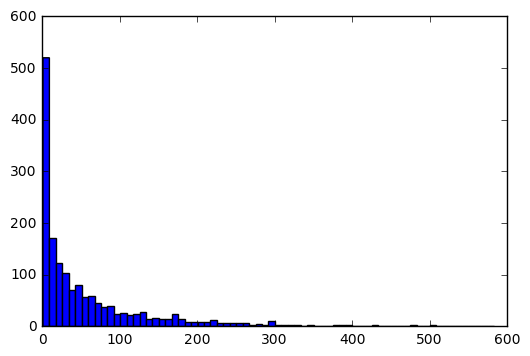

In [23]:
plt.hist(ratings['number of ratings'],bins=70)
plt.show()

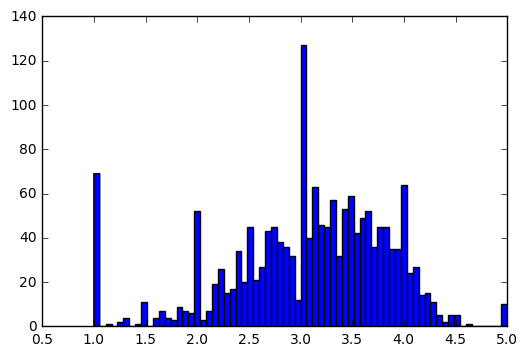

In [24]:
plt.hist(ratings['rating'],bins=70)
plt.show()

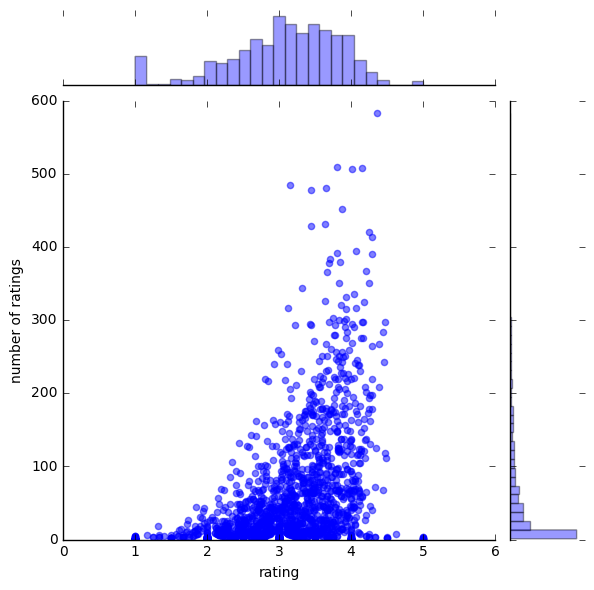

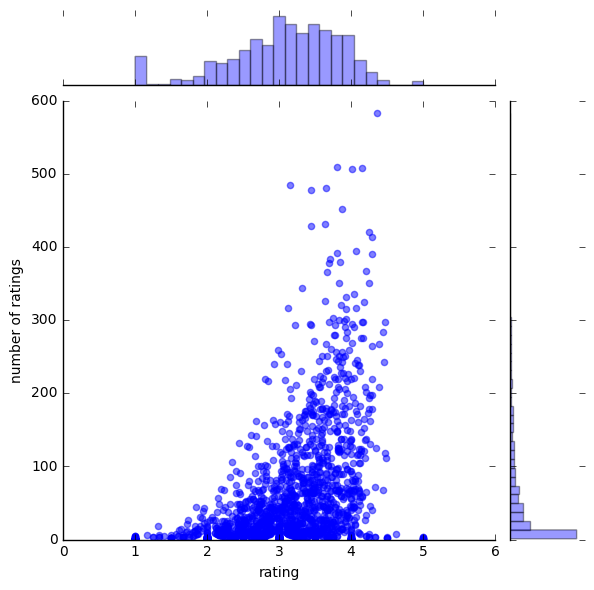

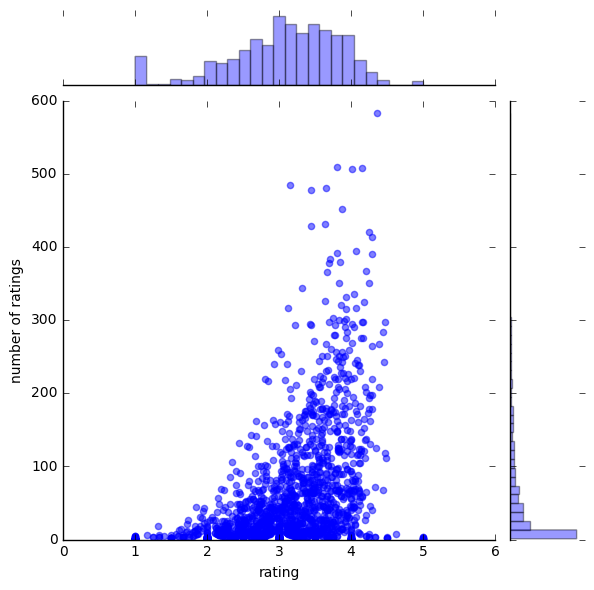

In [27]:
sns.jointplot(x='rating',y='number of ratings',data=ratings,alpha=0.5 )
plt.show()

In [30]:
moviemat=data.pivot_table(index="user_id",columns="titles",values="rating")


In [31]:
moviemat
#there are lot of nan values as all the users have not watched all the movies

titles,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
6,NaN,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,4.0,NaN,NaN,5.0,5.0,NaN,4.0,...,NaN,NaN,NaN,5.0,3.0,NaN,3.0,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
ratings.sort_values('number of ratings',ascending=False).head()

,rating,number of ratings
titles,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [34]:
starwars_user_ratings=moviemat['Star Wars (1977)']
starwars_user_ratings.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [37]:
#making the correlation with the other movie ie how correlated star wars is with contact and so on 
similar_to_starwars=moviemat.corrwith(starwars_user_ratings)
similar_to_starwars
#there are nan values as well as there is no person who rated star wars and that movie

titles
'Til There Was You (1997)                                   0.872872
1-900 (1994)                                               -0.645497
101 Dalmatians (1996)                                       0.211132
12 Angry Men (1957)                                         0.184289
187 (1997)                                                  0.027398
2 Days in the Valley (1996)                                 0.066654
20,000 Leagues Under the Sea (1954)                         0.289768
2001: A Space Odyssey (1968)                                0.230884
3 Ninjas: High Noon At Mega Mountain (1998)                      NaN
39 Steps, The (1935)                                        0.106453
8 1/2 (1963)                                               -0.142977
8 Heads in a Duffel Bag (1997)                             -0.577350
8 Seconds (1994)                                           -0.755929
A Chef in Love (1996)                                       0.868599
Above the Rim (1994)       

In [38]:
corr_starwars=pd.DataFrame(similar_to_starwars,columns=['correlation'])

In [39]:
corr_starwars

,correlation
titles,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
2 Days in the Valley (1996),0.066654
"20,000 Leagues Under the Sea (1954)",0.289768
2001: A Space Odyssey (1968),0.230884
3 Ninjas: High Noon At Mega Mountain (1998),NaN


In [40]:
corr_starwars.dropna(inplace=True)

In [41]:
corr_starwars
# all the na values are dropped 

,correlation
titles,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
2 Days in the Valley (1996),0.066654
"20,000 Leagues Under the Sea (1954)",0.289768
2001: A Space Odyssey (1968),0.230884
"39 Steps, The (1935)",0.106453


In [43]:
corr_starwars.sort_values('correlation',ascending=False).head()
# so we can see that hollow weed has perfect correlation with star wars

,correlation
titles,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0


In [45]:
corr_starwars=corr_starwars.join(ratings['number of ratings'])
corr_starwars.head()
#now we will put a threshold on the number of users that have rated star wars and the other movies

,correlation,number of ratings
titles,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [46]:
corr_starwars[corr_starwars['number of ratings']>100].sort_values('correlation',ascending=False)

,correlation,number of ratings
titles,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


##Predictions

In [55]:
def predict_movies(movie_name):
    movie_user_ratings=moviemat[movie_name]
    similar_to_movie=moviemat.corrwith(movie_user_ratings)
    corr_movie=pd.DataFrame(similar_to_movie,columns=['correlation'])
    corr_movie=corr_movie.join(ratings['number of ratings'])
    predictions=corr_movie[corr_movie['number of ratings']>100].sort_values('correlation',ascending=False)
    return predictions

In [56]:
predictions=predict_movies("Jungle2Jungle (1997)")

In [57]:
predictions

,correlation,number of ratings
titles,,
Jungle2Jungle (1997),1.000000,132
"Edge, The (1997)",0.730877,113
GoldenEye (1995),0.646619,131
Volcano (1997),0.645123,219
Down Periscope (1996),0.616411,101
Batman Forever (1995),0.611052,114
In the Name of the Father (1993),0.602764,102
"Ghost and the Darkness, The (1996)",0.584601,128
Under Siege (1992),0.583171,124
